## Lagrange interpolation

Given $(n+1)$ distinct points $\{X_i\}_{i=0}^n$ in the interval $[0,1]$,
we define the *Lagrange interpolation* operator $\mathcal{L}^n$ the operator
$$
\mathcal{L}^n : C^0([0,1]) \mapsto \mathcal{P}^n
$$
which satisfies
$$
(\mathcal{L}^n f)(X_i) = f(X_i), \qquad i=0,\dots,n.
$$

This operator is used to approximate the infinitely dimensional space $C^0([0,1])$ with a
finite dimensional one, $\mathcal{P}^n$, which is the space of polynomials of order n. 

Such a space has dimension $n+1$, and can be constructed using linear combinations of 
$n+1$ linear independent polynomials of order $\leq n$, for example, the monomials:

$$
\mathcal{P}^n = \text{span}\{v_i := x^i\}_{i=0}^{n}
$$

If we want to construct the Lagrange interpolation of a given function on $n+1$ equispaced points in 
$[0,1]$, then we are actively looking for an element of $\mathcal{P}^n$ that coincides with the function
at these given points.

Given a basis $\{v_i\}_{i=0}^n$, any element of $\mathcal{P}^n$ can be written as a linear combination of 
the basis, i.e., 

$$
\forall p \in \mathcal{P}^n, \quad  \exists! \{p^i\}_{i=0}^n  \quad| \quad p(x) = \sum_{i=0}^n p^i v_i(x)
$$

in what follows, we'll use [Einstein summation convention](https://en.wikipedia.org/wiki/Einstein_notation), and 
call $p$ a function of $\mathcal{P}^n$, and $[p]$ the $R^{n+1}$ vector representing its coefficients. 

If we want to solve the interpolation problem above, then we need to find the coefficients $p^i$ of the 
polynomial $p$ that interpolates $f$ at the points $X_i$:

$$
v_j(X_i) p^j = f(X_i), \qquad \Longleftrightarrow \qquad [[V]][p] = [F]
$$

(Remember Einstein summation convention)

This can be written as a linear problem $[V] [p] = [F]$, with system matrix $[V]_{ij} :=  v_j(X_i)$ and right 
hand side $[F]_i = f(X_i)$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def build_lagrangian_basis(q, e):
  n_q_points = q.shape[0]
  n_e_points = e.shape[0]

  # basis[i, j] is the value of l[j] on the point e[i] where
  # l[j] is the lagrange polynomial that is 1 on q[j] and 0
  # on q[k] for k != j
  basis = np.ones((n_e_points, n_q_points), dtype=np.float64)

  for i in range(n_e_points):
    for j in range(n_q_points):
      for k in range(n_q_points):
        if k == j:
          continue
        basis[i, j] *= (e[i] - q[k]) / (q[j] - q[k])
  return basis

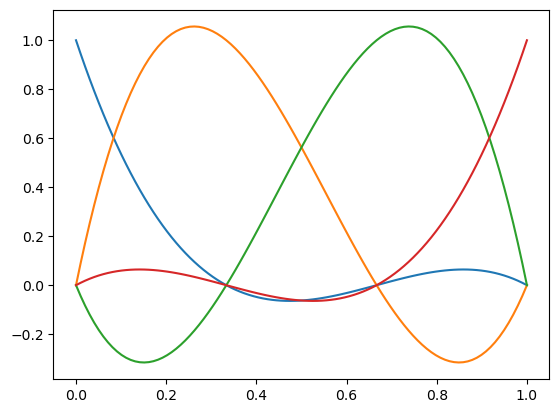

In [17]:
# Plot the Computed basis functions in the case
e = np.linspace(0, 1, 100)
q = np.linspace(0, 1, 4)

basis = build_lagrangian_basis(q, e)
plt.plot(e, basis)

In [20]:
# Define a function that computes the interpolation of a given function f
def interpolate(f, q, e):
  n_q_points = q.shape[0]
  n_e_points = e.shape[0]

  basis = build_lagrangian_basis(q, e)

  f_e = np.zeros((n_e_points,), dtype=np.float64)

  for i in range(n_e_points):
    for j in range(n_q_points):
      f_e[i] += basis[i, j] * f(q[j])
  return f_e

Use the functions above to interpolate the function $y = \sin(2\pi x)$, plot the results and compute the $L^2$ norm of the error

In [22]:
def f(x):
  return np.sin(2 * np.pi * x)

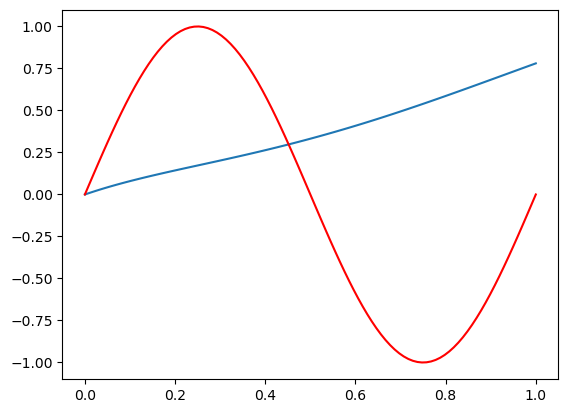

In [27]:
f_interp = interpolate(f, q, e)
plt.plot(e, f_interp)
plt.plot(e, f(e), color="red")

In [33]:
# Given an interval I = [a,b] define a function that gives N Chebishev-Gauss points
def GaussChebishev(a,b,N):
    x = np.zeros(N+1)
    for k in range(N):
        tk = np.cos((2*k+1)/(2*N+2)*np.pi)
        x[k] = (a+b)/2 + (b-a)/2*tk
    return x

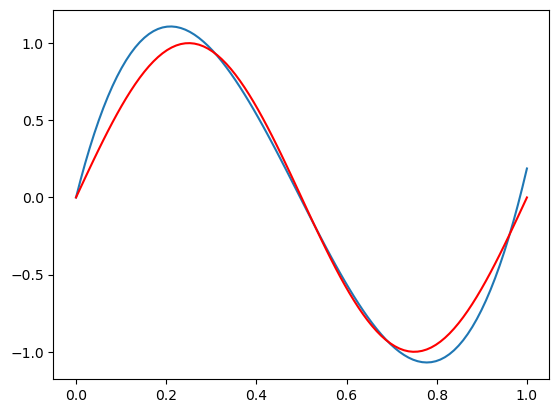

In [34]:
# Test the interpolation with the new points plotting the comparison and computing the error
q = GaussChebishev(0,1,3)

basis = build_lagrangian_basis(q, e)
f_interp = interpolate(f, q, e)
plt.plot(e, f_interp)
plt.plot(e, f(e), color="red")

In [40]:
# Given an interval I = [a,b] define a function that gives N Gauss-Chebishev-Lobatto points
def GaussChebishevLobatto(a,b,N):
    x = np.zeros(N+1)
    for k in range(N):
        tk = -np.cos(k*np.pi/N)
        x[k] = (a+b)/2 + (b-a)/2*tk
    return x

/tmp/ipykernel_3477/3636856579.py:15: RuntimeWarning: invalid value encountered in double_scalars
  basis[i, j] *= (e[i] - q[k]) / (q[j] - q[k])
/tmp/ipykernel_3477/3636856579.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  basis[i, j] *= (e[i] - q[k]) / (q[j] - q[k])
/tmp/ipykernel_3477/2740524732.py:12: RuntimeWarning: invalid value encountered in double_scalars
  f_e[i] += basis[i, j] * f(q[j])


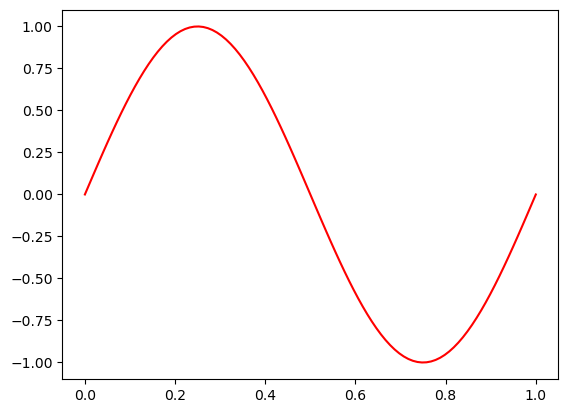

In [44]:
# Test the interpolation with the new points plotting the comparison and computing the error
q = GaussChebishevLobatto(0,1,2)

basis = build_lagrangian_basis(q, e)
f_interp = interpolate(f, q, e)
plt.plot(e, f_interp, "*")
plt.plot(e, f(e), color="red")